<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---
#### Package imports

In [19]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
#Set the grid
sns.set_style("dark")
# talk sns.set_context('talk') 

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens
%config InlineBackend.figure_format = 'retina'


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [20]:
pwd

'/Users/ramv/Downloads/Projects/After Submission/Project-2-Submission-master/Ram Project-2-Submission'

In [21]:
#Convert csv to python dictionary#
import csv
       
reader = csv.DictReader(open('/Users/ramv/Downloads/Projects/After Submission/Project-2-Submission-master/Ram Project-2-Submission/sat_scores.csv'))
sat = {}
for row in reader:
    for column, value in row.items():
        sat.setdefault(column, []).append(value)
print (sat)

#Credit Phil Frost#
#http://stackoverflow.com/questions/14091387/creating-a-dictionary-from-a-csv-file#

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [22]:
#Create a dataframe from nested dictionary #
dfObj = pd.DataFrame(sat)

In [23]:
#Read into the csv file 
nsat = pd.read_csv('./sat_scores.csv')

In [24]:
#To know the dictionary of dataframe
dfObj.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [25]:
nsat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

Difference between loading from file and inputting this dictionary
If we load the file using pandas we'll get the original data types of the columns, but from inputting dictionary data types of columns will be considered as string(object). 

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [26]:
#To look at the data of first ten rows
nsat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [27]:
#To look at the data of last 5 rows
nsat.tail(5)

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [28]:
#Lets drop the last row to make the data more efficient.
nwsat=nsat.drop(nsat.index[51])
nwsat

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [29]:
#To find out the rows and columns of the data.
nwsat.shape

(51, 4)

The data consists of 51 rows and 4 columns. Rows represents the states and columns represents rate,verbal and math.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [30]:
#Creating an empty dictionary and loading with data.

sat_dict = {}

sat_dict['variables'] = list(nwsat.columns)
sat_dict['types'] = ['String', 'Integer', 'Integer', 'Integer']
sat_dict['description'] = ['State', 'Rate', 'Verbal', 'Math']
sat_dict['shape'] = [51,4]

sat_dict

{'variables': ['State', 'Rate', 'Verbal', 'Math'],
 'types': ['String', 'Integer', 'Integer', 'Integer'],
 'description': ['State', 'Rate', 'Verbal', 'Math'],
 'shape': [51, 4]}

In [31]:
nwsat.info()
nwsat.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


(51, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

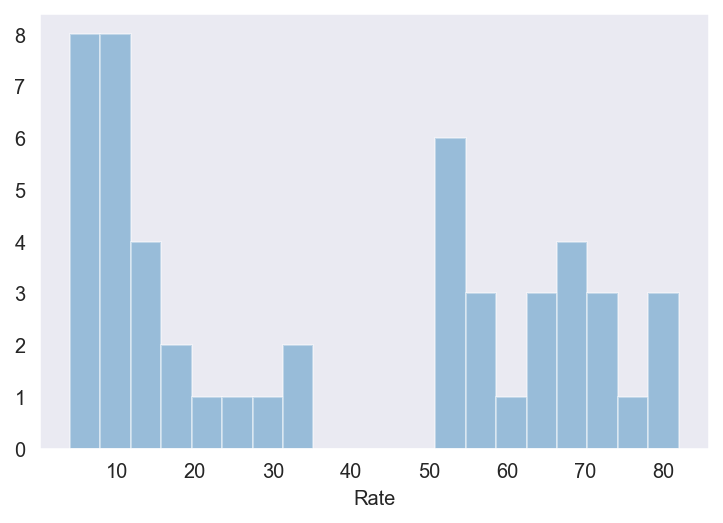

In [32]:
sns.distplot(nwsat['Rate'],kde=False,bins=20)

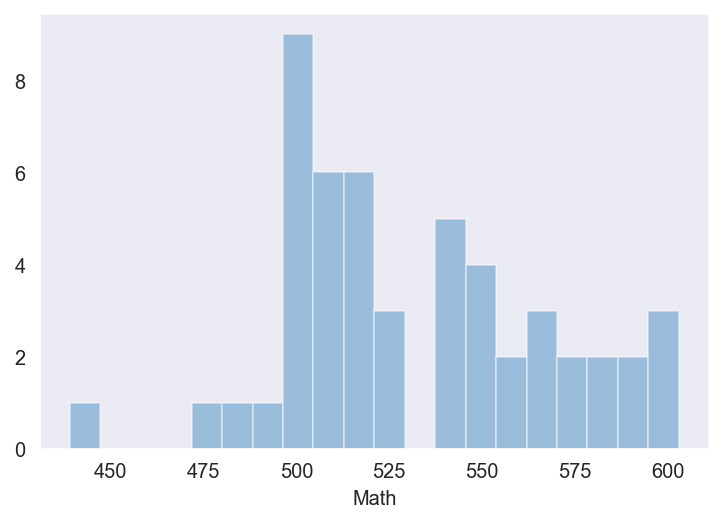

In [33]:
sns.distplot(nwsat['Math'], kde=False,bins=20)

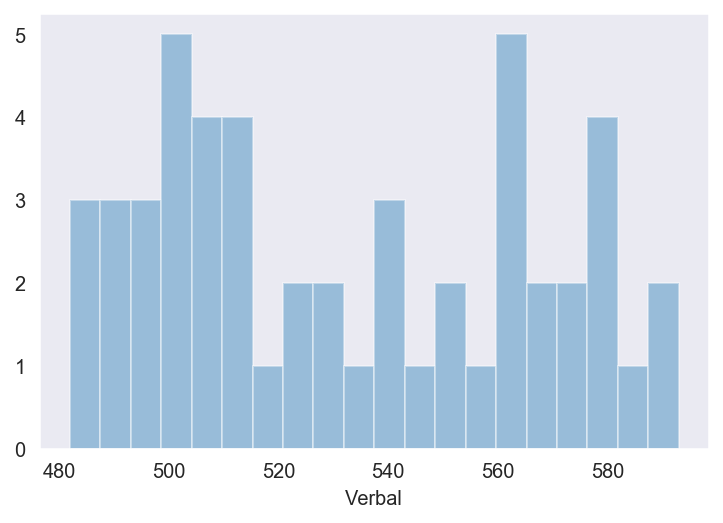

In [34]:
sns.distplot(nwsat['Verbal'], kde=False,bins=20)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

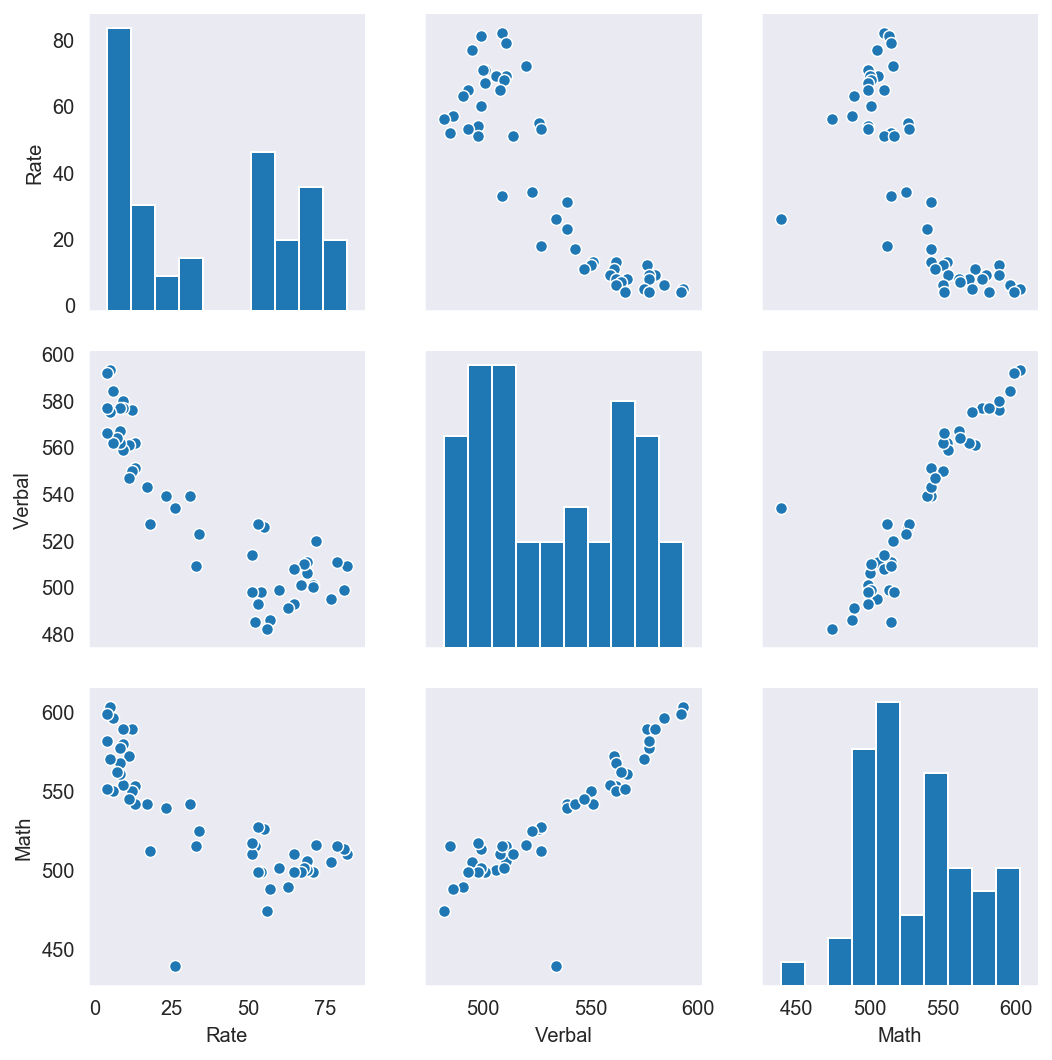

In [35]:
sns.pairplot(nwsat)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5, 1.0, 'Verbal and Maths per States')

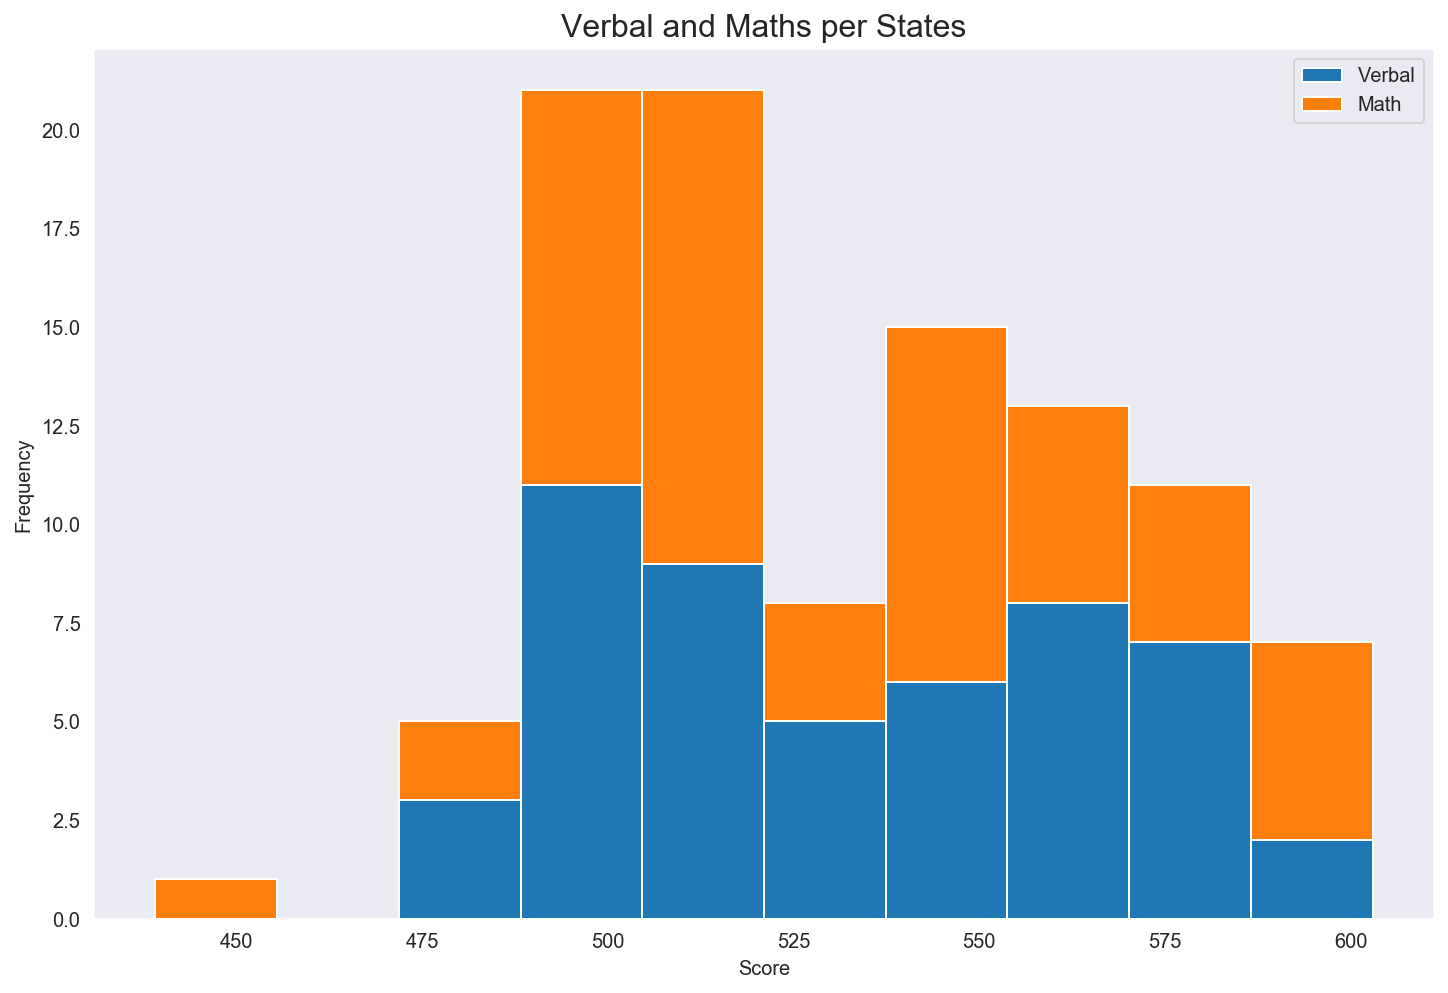

In [36]:
a = nwsat[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(12,8))
a.set_xlabel("Score")
a.set_title("Verbal and Maths per States", fontsize=16)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

### Boxplot gives us the distribution of values along with upper, lower and median values whereas scatter plots gives us the trends and histogram only gives the frequency.
### Plotting box-plot of Rate on the same chart as Math and Verbal is not resourceful because y-axis is considered as Score and Rate doesn't represent any relative score.

Text(0.5, 1.0, 'Verbal and Maths Scores')

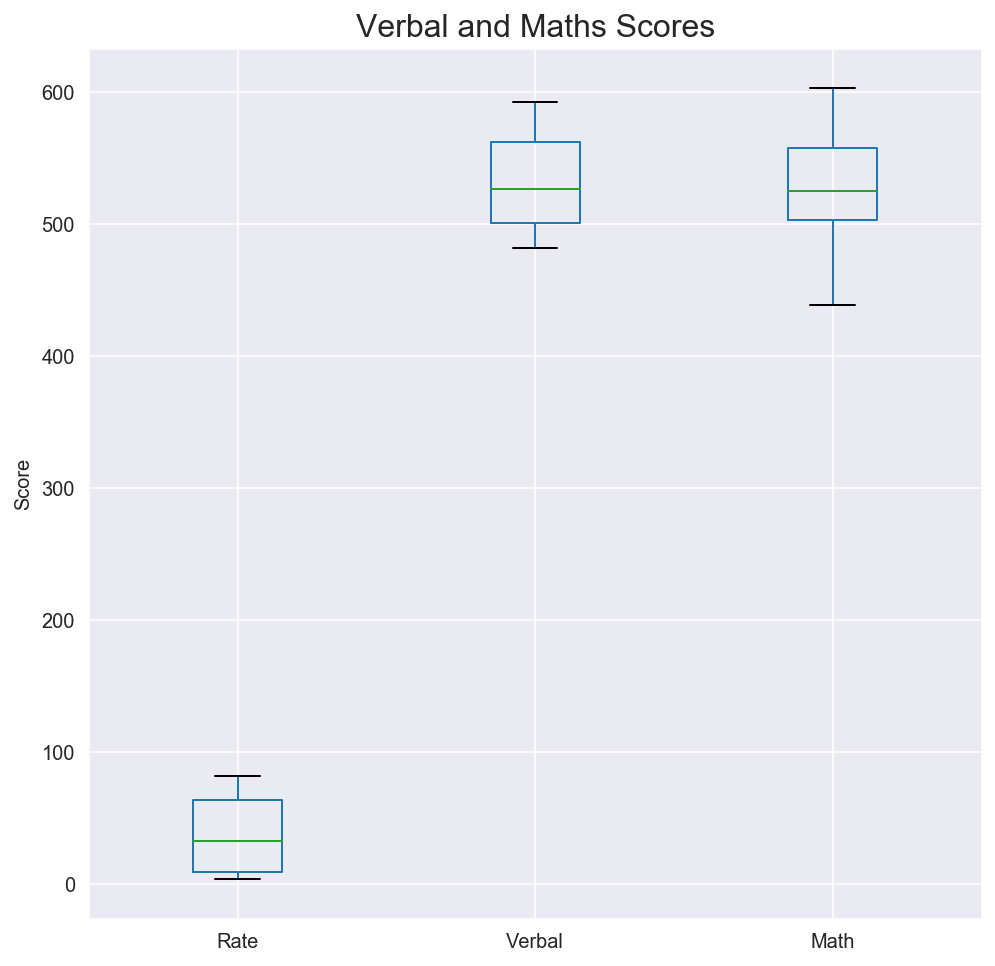

In [37]:
a = nwsat.boxplot(figsize=(8,8),)
a.set_ylabel("Score")
a.set_title("Verbal and Maths Scores", fontsize=16)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [38]:
def s_values(x):
    xout = (x-np.mean(x))/np.std(x)
    return xout

In [39]:
nsat0 = nsat.copy()
nsat0.Verbal = s_values(nsat0.Verbal.values)
nsat0.Math = s_values(nsat0.Math.values)
nsat0.Rate = s_values(nsat0.Rate.values)
nsat0.head()

,State,Rate,Verbal,Math
0,CT,1.658635,-0.699352,-0.602798
1,NJ,1.621650,-1.003164,-0.518687
2,MA,1.547680,-0.638589,-0.462613
3,NY,1.473710,-1.124689,-0.742984
4,NH,1.288785,-0.365159,-0.434575


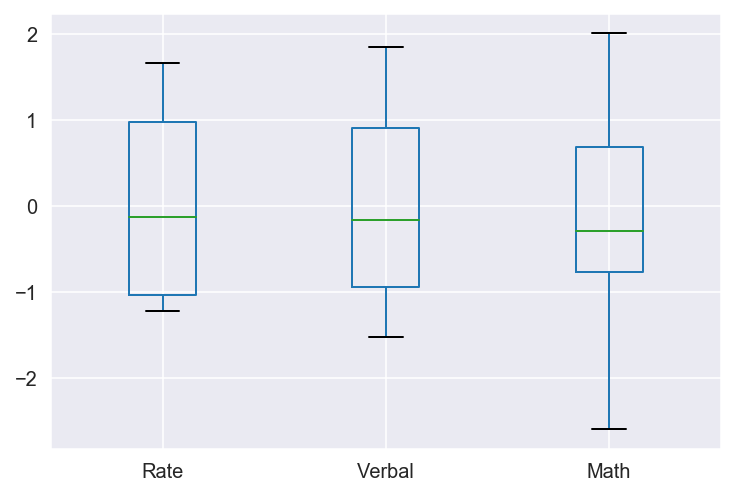

In [40]:
nsat0.boxplot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [41]:
avenwsat = nwsat[nwsat['Verbal'] > nwsat['Verbal'].mean()]['State']
avenwsat.count()

24

### There are 24 States above mean. We can draw a conclusion that lower the participation the more increase in the score.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [42]:
mednwsat = nwsat[nwsat['Verbal'] > nwsat['Verbal'].median()]['State']
mednwsat.count()

24

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [43]:
#Create a new column Diff in the nwsat DataFrame.Create a for loop by zipping the columns in Verbal and Math
nwsat['Diff'] = [a-b for a,b in zip(nwsat.Verbal,nwsat.Math)]
nwsat.head()

,State,Rate,Verbal,Math,Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [44]:
#Create a dataframe with 10 states using head() 
#where sorting of the values is done by difference using sort_values
#Assigning ascending false because we want the highest difference at the top.
nwsat.diff_10_States = nwsat.sort_values(by='Diff',ascending=False).head(10)
nwsat.diff_10_States

/Users/ramv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,State,Rate,Verbal,Math,Diff
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [45]:
#Having assigned the order because default will give you the lowest difference first.
nwsat.idiff_10_States = nwsat.sort_values(by='Diff').head(10)
nwsat.idiff_10_States

/Users/ramv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,State,Rate,Verbal,Math,Diff
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
49,ND,4,592,599,-7


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


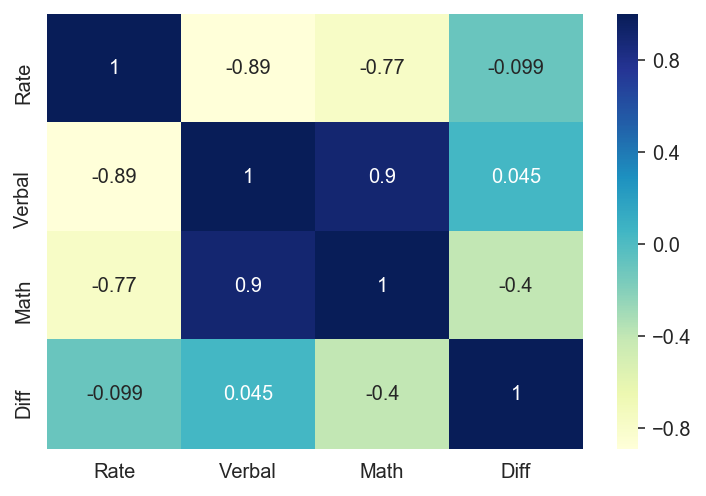

In [46]:
nwsat_corr = nwsat.corr()
sns.heatmap(nwsat_corr,annot=True,cmap='YlGnBu')

The darkblue section has the higher correlation between Math & Verbal which is 1.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [47]:
nwsat.describe()

,Rate,Verbal,Math,Diff
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


### As the count suggests we have only 51 rows because we already have removed the 'All' row from the table.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [48]:
#Load the data using pandas 
#Present the first 5 rows of data.
drugs = pd.read_csv('./drug-use-by-age.csv')
drugs.head(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [49]:
#To find out the data types of all the columns
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

### As we can see there are 6 columns with a datatype of object Lets convert them to float. Also lets there are '-' values in some columns.Let's replace them with 0.

In [51]:
drugs.replace('-',0,inplace=True)
# #Sid's comment 
# drugs_na = pd.read_csv('./drug-use-by-age.csv', na_values='-')

In [52]:
drugs['cocaine-frequency'] = drugs['cocaine-frequency'].astype(float)
drugs['crack-frequency'] = drugs['crack-frequency'].astype(float)
drugs['heroin-frequency'] = drugs['heroin-frequency'].astype(float)
drugs['inhalant-frequency'] = drugs['inhalant-frequency'].astype(float)
drugs['oxycontin-frequency'] = drugs['oxycontin-frequency'].astype(float)
drugs['meth-frequency'] = drugs['meth-frequency'].astype(float)

In [53]:
drugs.head(3)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5


In [54]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [55]:
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [56]:
# make two new dataframes, drugs_use and drugs_frequency, to compare all of the 'Use' columns
# and 'Frequency' columns, respectively
drugs_use = drugs.filter(regex='use')
drugs_frequency = drugs.filter(regex='frequency')

In [57]:
# Add the 'Age column to both sub-dataframes
drugs_use.loc['age'] = drugs['age']
drugs_frequency.loc['age'] = drugs['age']

/Users/ramv/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


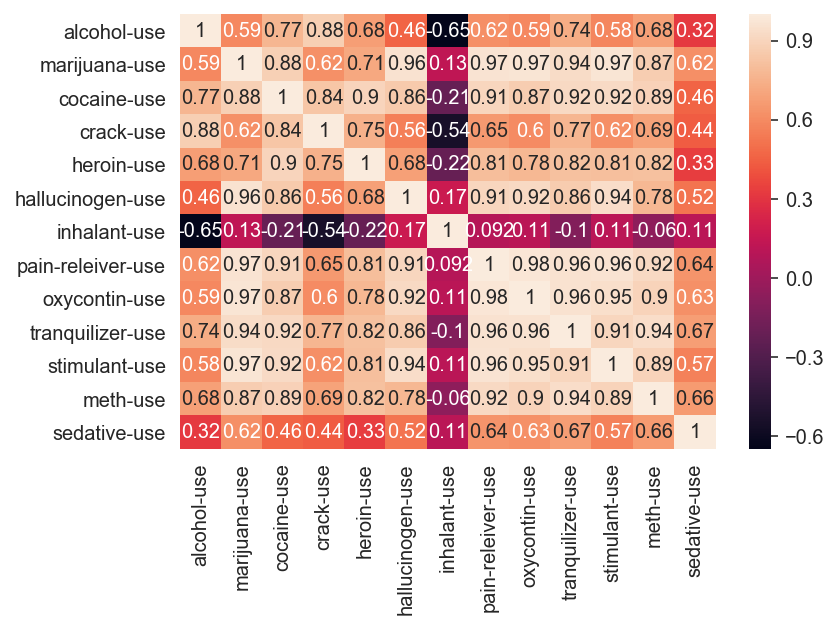

In [58]:
#Find out the correlation between "use" variables
# Notice that inhalant is a strong outlier
sns.heatmap(drugs_use.corr(), annot=True)

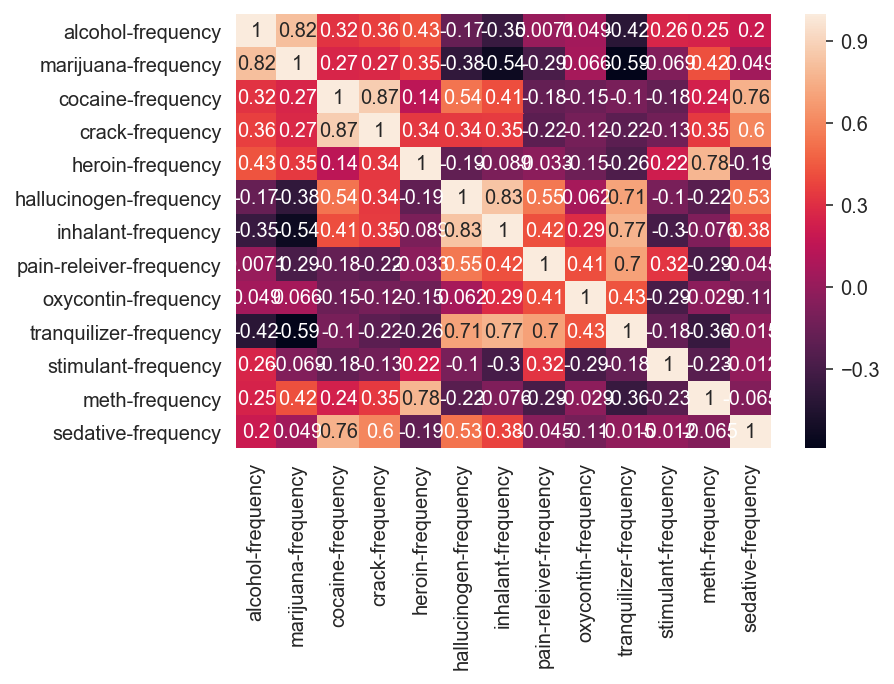

In [59]:
#find out the correlation between "frequency" variables
sns.heatmap(drugs_frequency.corr(), annot=True)

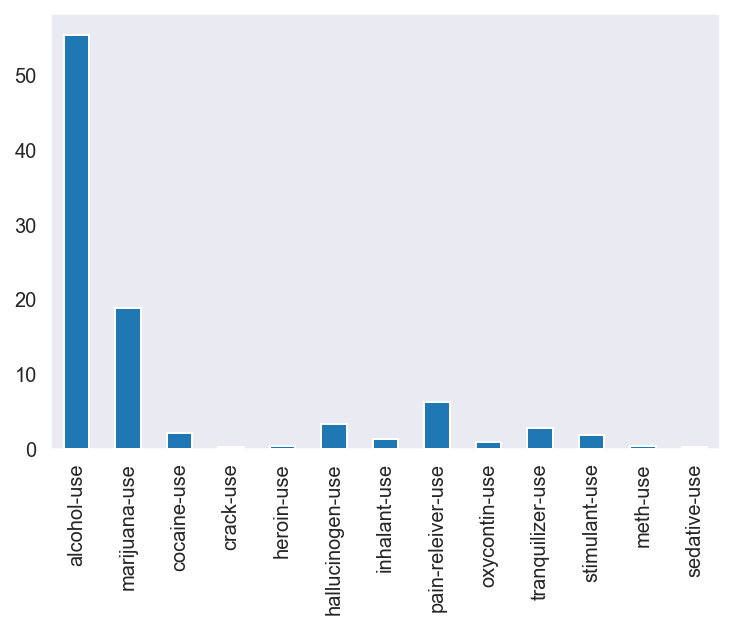

In [60]:
#find out the mean between all use "variables" and plot a bar graph to see which ranks higher
drugs_use.mean().plot(kind='bar')

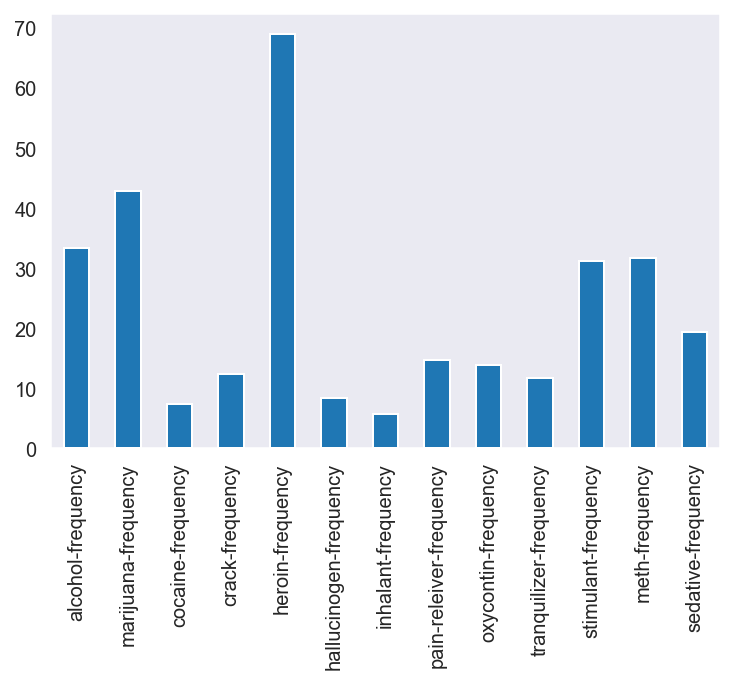

In [61]:
#find out the mean between all "frequency" variables and plot a bar graph to see which ranks higher
drugs_frequency.mean().plot(kind='bar')

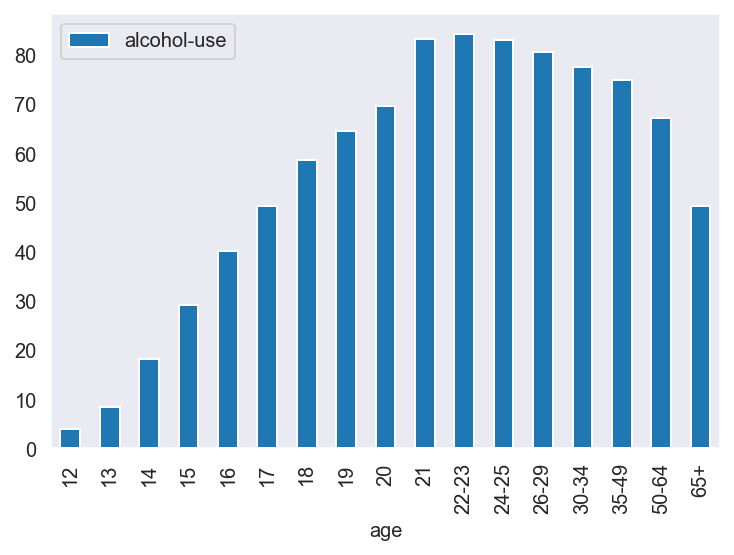

In [62]:
#Plot the use variables against age to see which age group is using alcohol more
drugs.plot('age', 'alcohol-use', kind='bar')

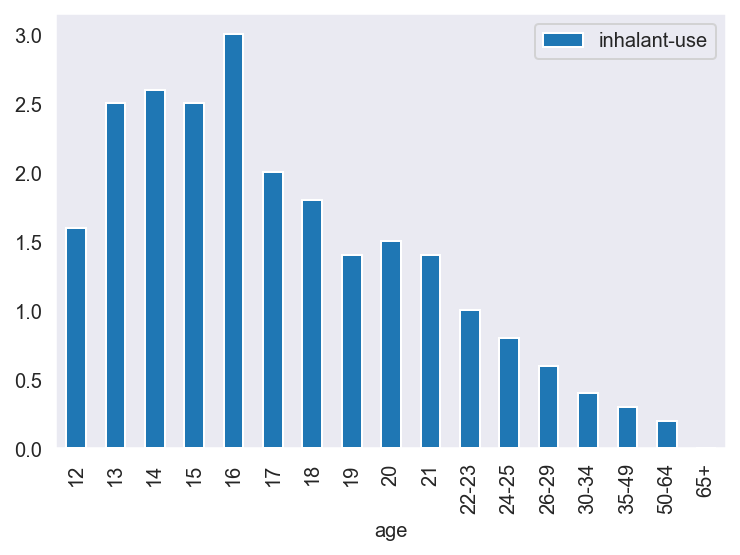

In [63]:
#Plot the inhalant use varaibles against age.
drugs.plot('age', 'inhalant-use', kind='bar')

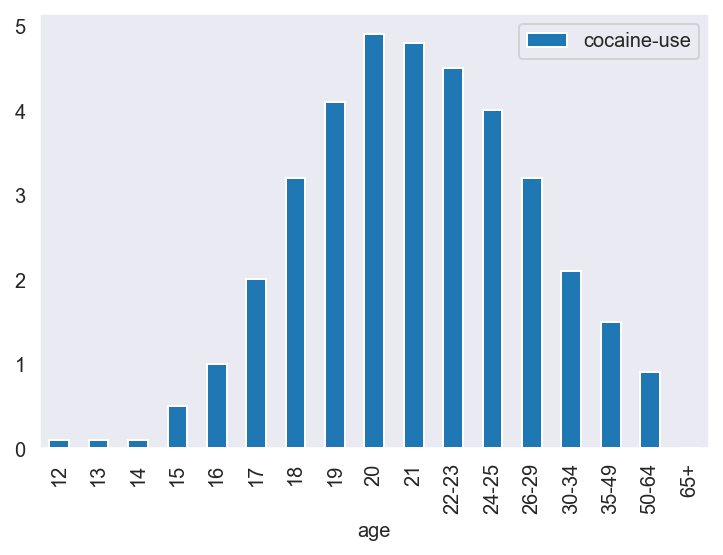

In [64]:
drugs.plot('age', 'cocaine-use', kind='bar')

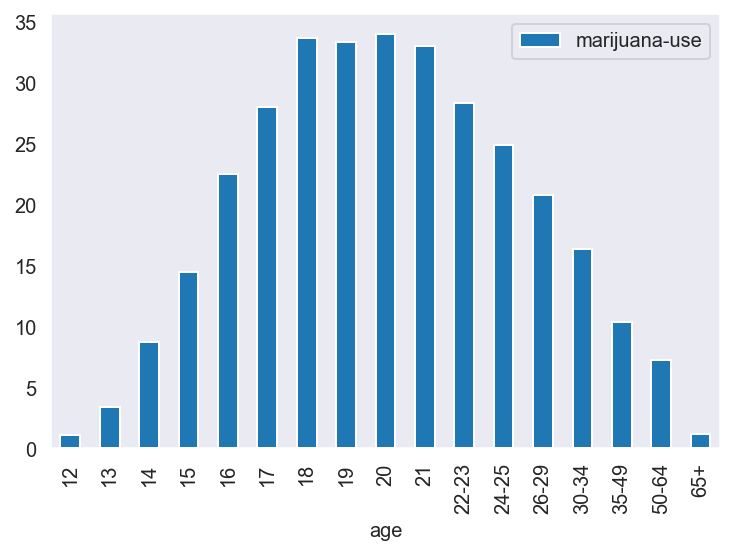

In [65]:
drugs.plot('age', 'marijuana-use', kind='bar')

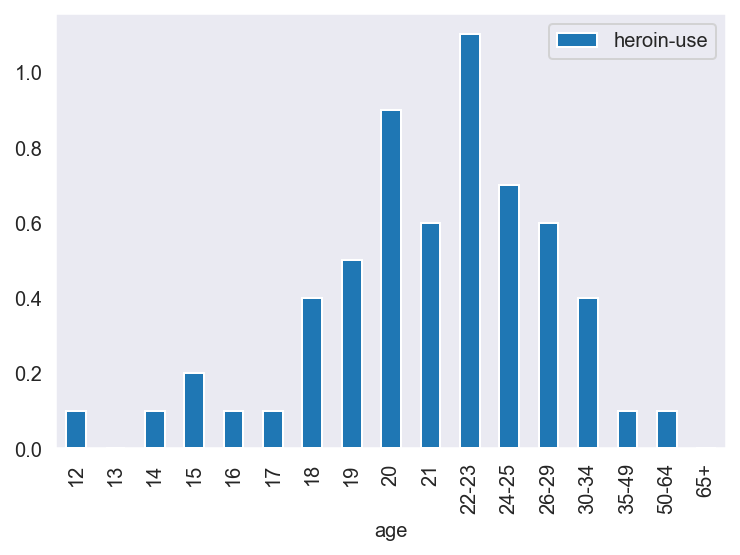

In [66]:
drugs.plot('age', 'heroin-use', kind='bar')

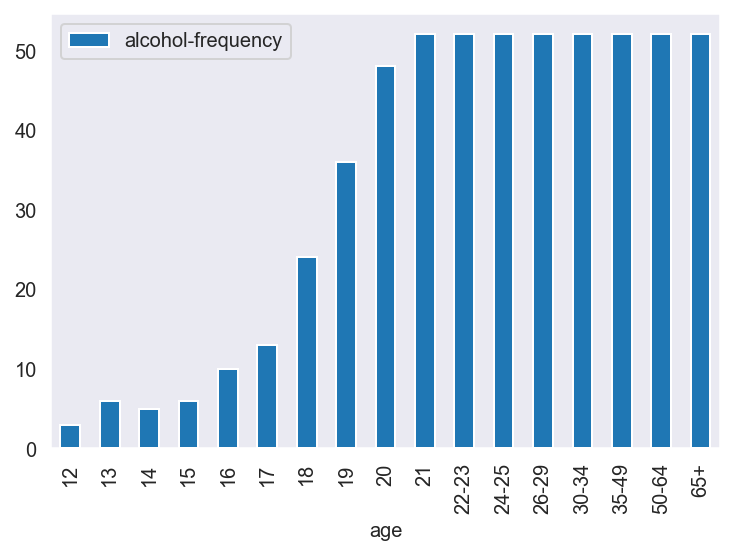

In [67]:
drugs.plot('age', 'alcohol-frequency', kind='bar')

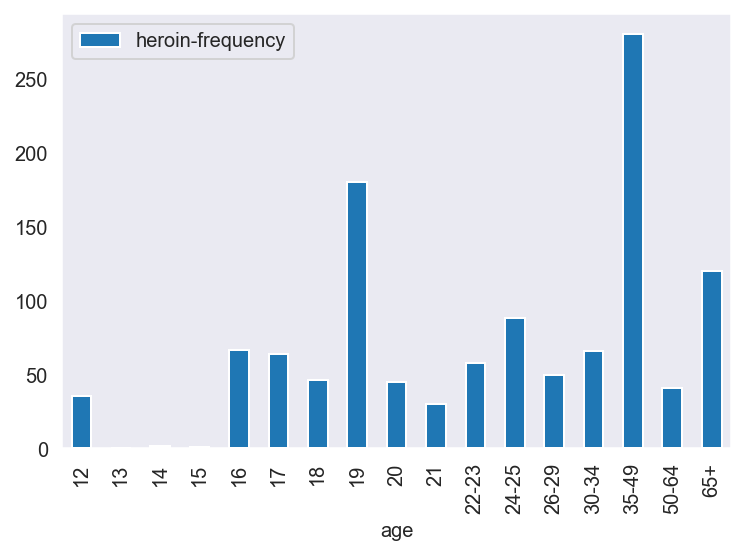

In [68]:
drugs.plot('age', 'heroin-frequency', kind='bar')

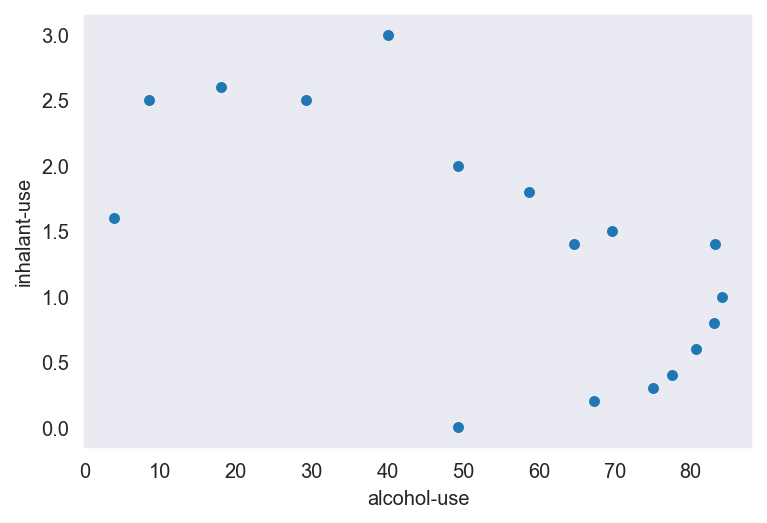

In [69]:
#Plot a scatter graph to find out the correlation between alcohol and inhalant use. There's a negative correlation.
drugs.plot('alcohol-use', 'inhalant-use', kind='scatter')

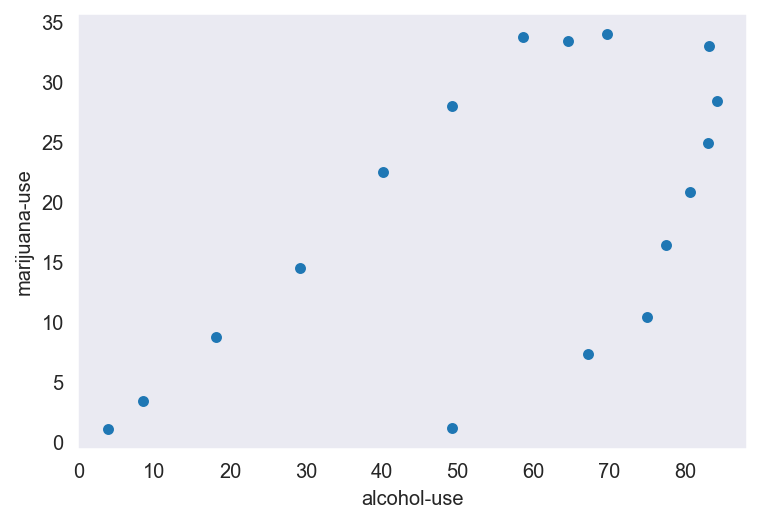

In [70]:
drugs.plot('alcohol-use', 'marijuana-use', kind='scatter')

### By the above graphs we can say that the top 3 drugs are alcohol, marijuana and heroin.
### The usage of the drug scale has been increasing over the years from the teenage.
### Therefore we can predict that effective campaigns should primarily target teenagers and rest of age groups

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

**Question and deliverables

My question involves comparing the usage rate of drugs and the frequency with which those drugs are used. The question is: How are usage rate and frequency of usage related? More specifically, as usage increases does frequency increase? Or is there no relationship between the two?

Null hypothesis: There is no relationship between use and frequency. 

Alternate hypothesis: There is a relationship between use and frequency. As one increase, the other increases.(or decreases)

Deliverables: Correlation heatmaps, plots (scatter), and t-test comparing use and frequency.




In [71]:
# Create new dataframe to compare the mean usage and frequency between drugs
# Create first column using the feature names from the original dataset 
freq_use_ratio = pd.DataFrame(['alcohol', 'marijuana', 'cocaine', 'crack',
       'heroin', 'hallucinogen', 'inhalant', 'pain-releiver',
       'oxycontin', 'tranquilizer', 'stimulant', 'meth',
       'sedative'], columns=['drug'])
freq_use_ratio

,drug
0,alcohol
1,marijuana
2,cocaine
3,crack
4,heroin
5,hallucinogen
6,inhalant
7,pain-releiver
8,oxycontin
9,tranquilizer


In [72]:
# create columns showing the mean frequency and usage rate of each drug
freq_use_ratio['frequency'] = np.array(drugs_frequency.mean())
freq_use_ratio['use'] = np.array(drugs_use.mean())

# create column that is the ratio between frequency and usage rate
freq_use_ratio['freq_to_use_ratio'] = freq_use_ratio['frequency'] / freq_use_ratio['use']
freq_use_ratio

,drug,frequency,use,freq_to_use_ratio
0,alcohol,33.352941,55.429412,0.601719
1,marijuana,42.941176,18.923529,2.269195
2,cocaine,7.411765,2.176471,3.405405
3,crack,12.382353,0.294118,42.100000
4,heroin,68.970588,0.352941,195.416667
5,hallucinogen,8.411765,3.394118,2.478336
6,inhalant,5.794118,1.388235,4.173729
7,pain-releiver,14.705882,6.270588,2.345216
8,oxycontin,13.941176,0.935294,14.905660
9,tranquilizer,11.735294,2.805882,4.182390


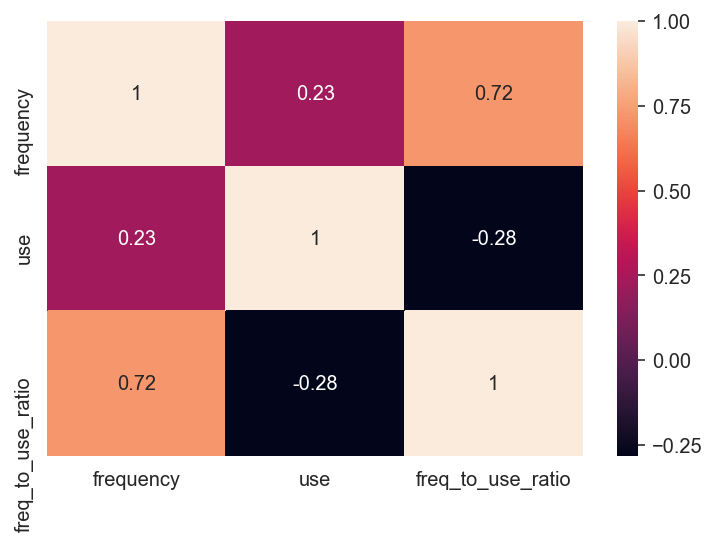

In [73]:
# correlation heatmap to compare Pearson Correlation between frequency, use and frequency to use ratio
sns.heatmap(freq_use_ratio.corr(), annot=True)

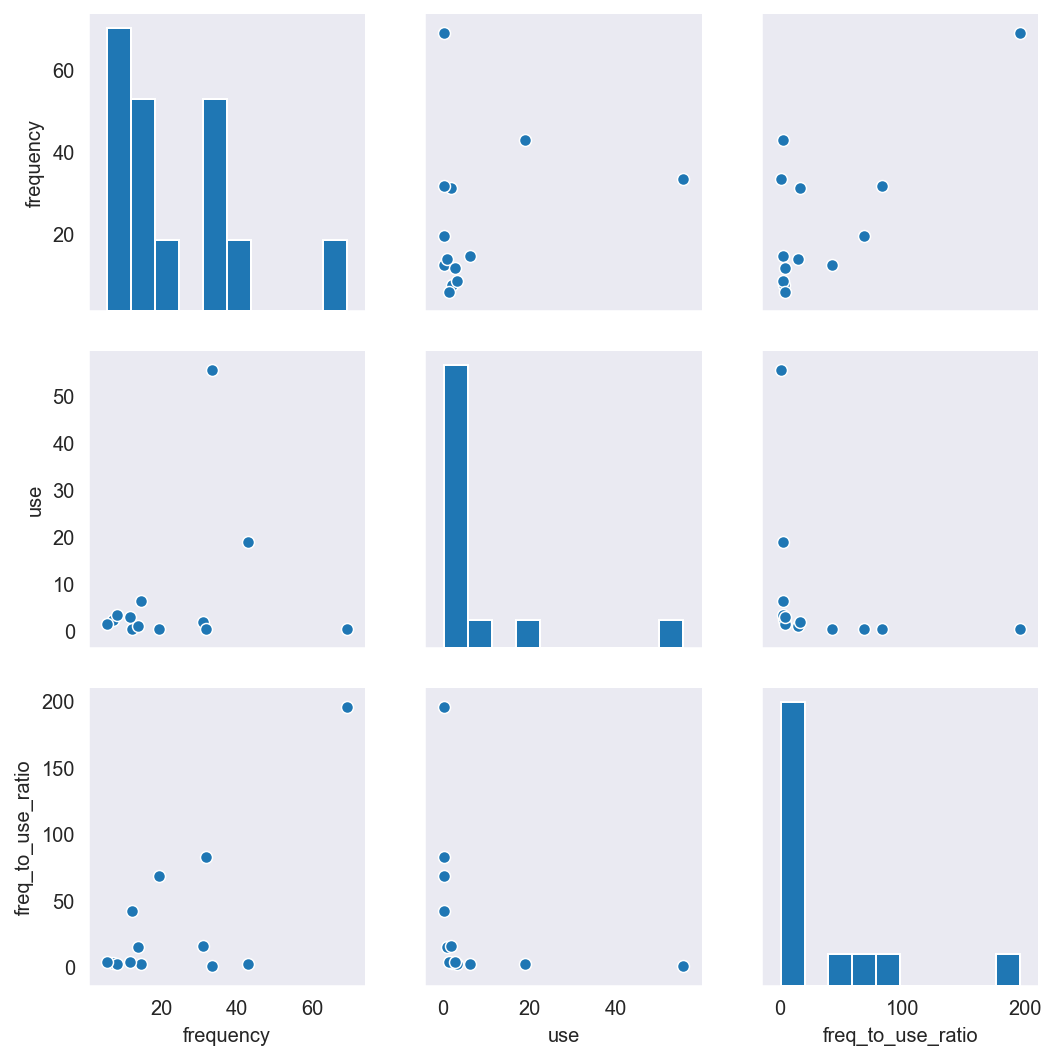

In [98]:
# pairplot to see distributions amongst the three features
sns.pairplot(data=freq_use_ratio)

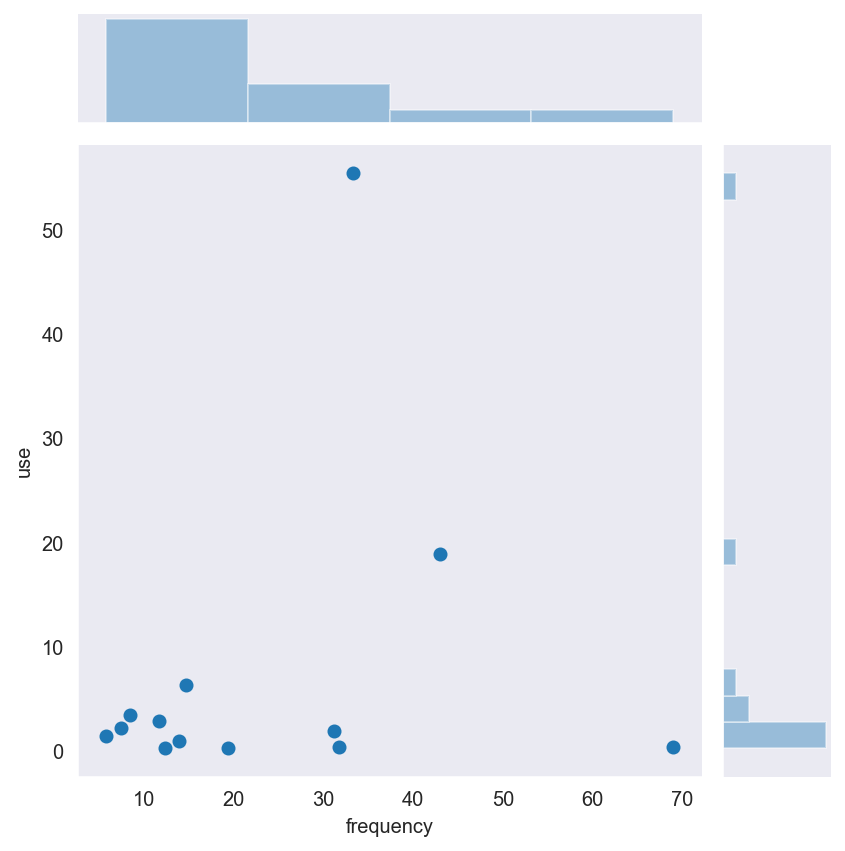

In [75]:
# scatter plot of frequency against use 
sns.jointplot('frequency', 'use', data=freq_use_ratio)

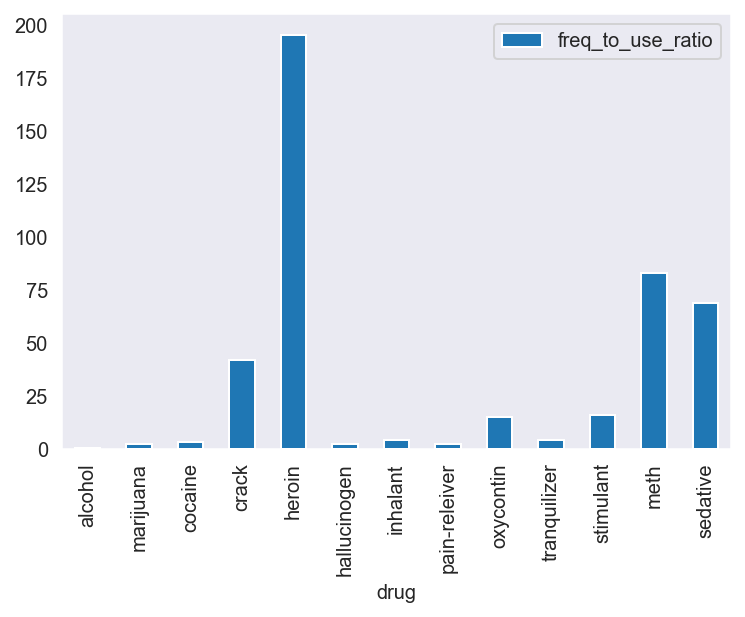

In [76]:
#Plot the bar graph to show frequency to use ratio
freq_use_ratio.plot('drug', 'freq_to_use_ratio', kind='bar')

In [77]:
# Run t-test between frequency and use columns of the new dataframe
# print out the t-stat and p-value
t_stat, p_value = stats.ttest_ind(freq_use_ratio['use'], freq_use_ratio['frequency'])
print('t-stat:', t_stat)
print('p-value:', p_value)

t-stat: -2.428701705496007
p-value: 0.023013589158879726


**Report**
The first step of the EDA is to plot the heat map of the correlations between the three variables, with the main one I'm looking at is the frequency vs use correlation, which shows a (somewhat) decent positive correlation of 0.23. Enough to do some more testing.

When I plot a frequency vs usage scatter plot, there doesn't appear to be an obvious pattern.We can see that most of the data fall in the 0-8 use rate and between 0-20 in terms of frequency. We see that the drugs with the two highest usage rates (alcohol and marijuana) also have two of the highest frequency rates. The main outlier is heroin with one of the lowest use rates but by far the highest frequency.

Next I plotted the ratio between frequency and usage. It's easy to see that heroin is the big outlier here as it has one of the smallest usage rates, but it has the largest frequency. In other words, there aren't a lot of heroin users, but for those that do, they use it a lot. Meth and sedatives have fairly large ratios as well, being used much more often compared with the total number of people that use them. It's also notable here that alcohol and marijuana have two of the lowest ratios, even with a fairly high frequency, due to such a high usage number in the denominator.

Finally, I run the t-test between frequency and use. We find there to be a t-stat of -2.43 and a p-value of 0.023. The p-value is low enough to reject the null hypothesis that there is no relationship between frequency and use.When we plot the two values in a scatter plot, there is not a strong relationship, so it's hard to really draw any conclusions or have any predictive power if we were to only know one of the variables.

It was interesting to see drugs that are perhaps used by a small number of people, but used very frequently; heroin being the most notable one here as having by far the highest frequency but only used by 0.35% of people amoung all age groups. Also notable, the two most widely used drugs (alcohol and marijuana) also have two of the highest frequency numbers. This means that these two are very heavily consumed drugs. Other drugs have small use rates and also relatively small frequencies, meaning not a very widely consumed drugs.


...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [78]:
# Create new dataframe, rate
rate = nwsat[['Rate']].copy()
rate.head()

,Rate
0,82
1,81
2,79
3,77
4,72


In [79]:
rate.describe()

,Rate
count,51.000000
mean,37.000000
std,27.550681
min,4.000000
25%,9.000000
50%,33.000000
75%,64.000000
max,82.000000


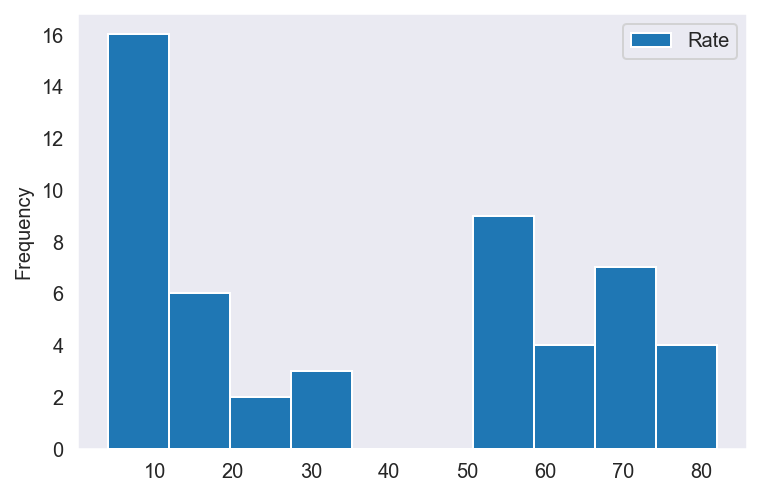

In [80]:
rate.plot.hist()

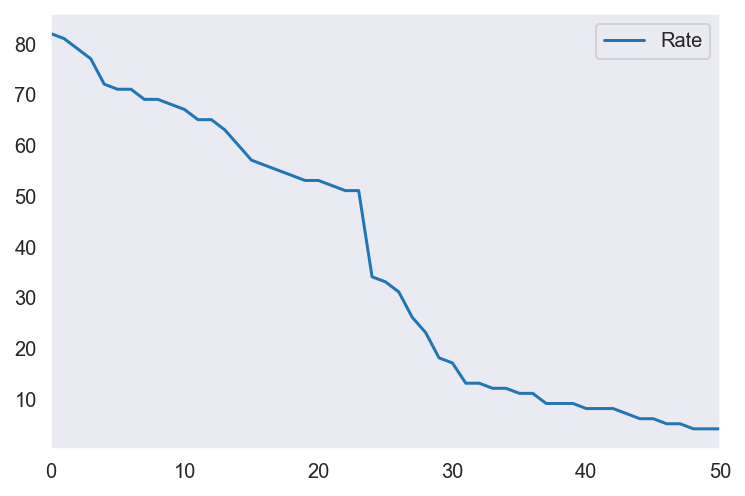

In [81]:
# Plot line chart of Rate variable
rate.plot()

Outliers are those that are far from data.
The two main groups of data, one group in the 50-80 range, and another in the 5-20 range.
Anything outside of these two groups can be considered outliers. 
Therefore, I will remove anything with a Rate between 20 and 50.

In [82]:
print(rate.loc[(rate['Rate'] > 20) & (rate['Rate'] < 50), :])

    Rate
24    34
25    33
26    31
27    26
28    23


In [83]:
# Create new DataFrame that removes all values above 20 and below 50
rate_no_outliers = rate.loc[(rate['Rate'] <= 20) | (rate['Rate'] >= 50), :]

In [84]:
rate_no_outliers.shape

(46, 1)

In [85]:
rate_no_outliers.describe()

,Rate
count,46.000000
mean,37.826087
std,28.883909
min,4.000000
25%,9.000000
50%,51.000000
75%,65.000000
max,82.000000


Mean and standard deviation change too much as most of the outliers are in the middle. But the median has changed a lot.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [86]:
nrnwsat = nwsat.copy(True)
nrnwsat = nwsat.drop(columns=['Rate'])
nrnwsat.head()

,State,Verbal,Math,Diff
0,CT,509,510,-1
1,NJ,499,513,-14
2,MA,511,515,-4
3,NY,495,505,-10
4,NH,520,516,4


In [87]:
nrnwsat.describe()

,Verbal,Math,Diff
count,51.000000,51.000000,51.000000
mean,532.529412,531.843137,0.686275
std,33.360667,36.287393,15.839811
min,482.000000,439.000000,-30.000000
25%,501.000000,503.000000,-6.000000
50%,527.000000,525.000000,0.000000
75%,562.000000,557.500000,4.500000
max,593.000000,603.000000,95.000000


In [88]:
nrnwsat.corr()

,Verbal,Math,Diff
Verbal,1.000000,0.899909,0.044527
Math,0.899909,1.000000,-0.395574
Diff,0.044527,-0.395574,1.000000


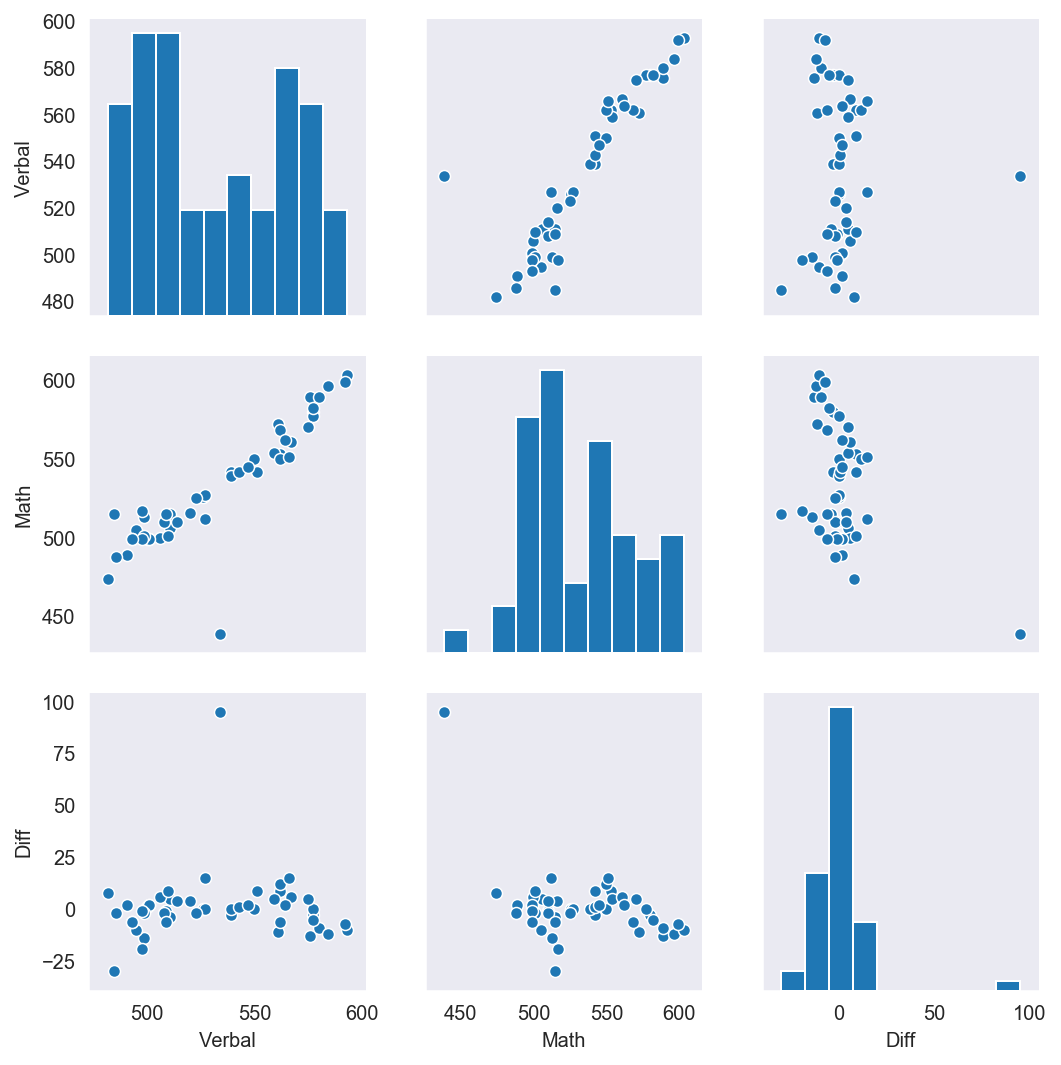

In [89]:
#use pairplot to see if there is an outlier
sns.pairplot(nrnwsat)

Outliers are  < or > 3 standard deviation away from the mean

In [90]:
verbalMean = nrnwsat['Verbal'].mean()
verbalStd = 3 * nrnwsat['Verbal'].std()
verbalLower = verbalMean - verbalStd
verbalUpper = verbalMean + verbalStd
print (verbalMean, verbalStd)
print (verbalLower, verbalUpper)

532.5294117647059 100.082001672746
432.44741009195985 632.6114134374518


In [91]:
rowVerbalMask = (nrnwsat['Verbal'] < verbalLower) | (nrnwsat['Verbal'] > verbalUpper)

In [92]:
#math
mathMean = nrnwsat['Math'].mean()
mathStd = 3 * nrnwsat['Math'].std()
mathLower = mathMean - mathStd
mathUpper = mathMean + mathStd
print (mathMean, mathStd)
print (mathLower, mathUpper)

531.843137254902 108.86217946397664
422.98095779092534 640.7053167188786


In [93]:
rowMathMask = (nrnwsat['Math'] < mathLower) | (nrnwsat['Math'] > mathUpper)

In [94]:
nwsat1 = nrnwsat[rowMathMask]
nwsat1.count()

State     0
Verbal    0
Math      0
Diff      0
dtype: int64

In [95]:
nwsat2 = nrnwsat[rowVerbalMask]
nwsat2.count()

State     0
Verbal    0
Math      0
Diff      0
dtype: int64

In [96]:
outlier = nrnwsat['Diff'] == nrnwsat['Diff'].max()
no_outliers = nrnwsat.loc[outlier]
no_outliers

,State,Verbal,Math,Diff
27,OH,534,439,95


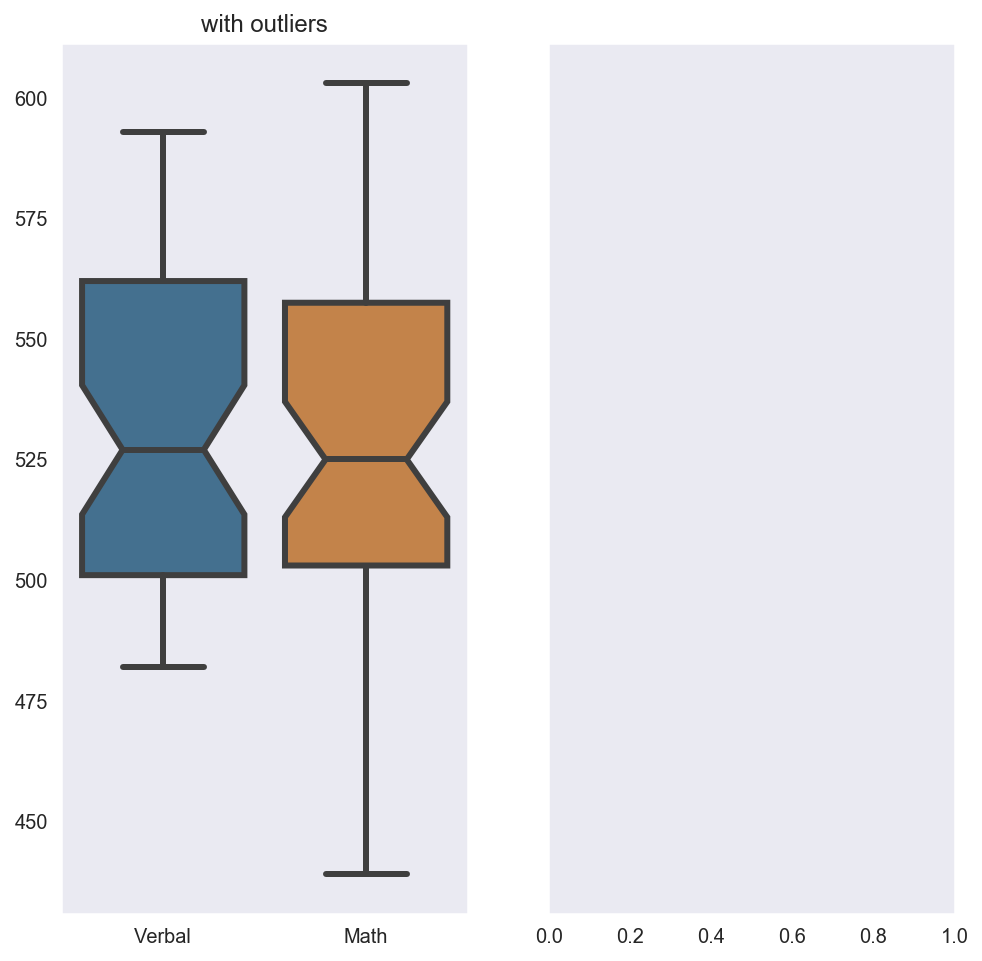

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(8,8))

ax = sns.boxplot(data=nwsat[['Verbal', 'Math']], orient='v', fliersize=3, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax1)
ax.set_title("with outliers")

#ax1 = sns.boxplot(data=no_outliers[['Verbal', 'Math']], orient='v', fliersize=3, 
                 #linewidth=3, notch=True, saturation=0.5, ax=ax2)
#ax1.set_title("no outliers")

plt.show()